# Part 3: Machine learning

## Classification to predict the price

In [181]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)

from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler, OrdinalEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score, classification_report, accuracy_score, confusion_matrix, mean_squared_error, r2_score 
from sklearn.compose import ColumnTransformer
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [108]:
df=pd.read_excel("webscraping.xlsx")
df.head()

,Name,Type,City,Visiting time,Adults,Children,Latitude,Longitude
0,Récréalle Centre Récréatif,recreational,Alle-sur-Semois,Not Available,20.0,20.0,49.842121,4.972678
1,Château de Jehay,cultural,Amay,1h,5.0,3.0,50.549776,5.324099
2,Espace muséal d'Andenne - Le Phare,cultural,Andenne,1h30 à 2h00,8.0,0.0,50.489398,5.096547
3,Les Jardins d'eau d'Annevoie,natural,Annevoie,1h30,10.0,6.0,50.341611,4.838456
4,Dinant Evasion - Lesse kayaks,recreational,Anseremme (Dinant),5h (21 km) • 2h30 (12 km) • 2h00 (9 km),25.5,25.5,50.237910,4.907923


In [109]:
X = df[['City','Type']]
y = df['Adults']

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [111]:
combined = pd.concat([X_train, X_test], axis=0)

In [112]:
categorical_cols = ['City','Type']

In [113]:
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

In [114]:
combined = preprocessor.fit_transform(combined).toarray()

In [115]:
X_train = combined[:len(X_train)]
X_test = combined[len(X_train):]

In [116]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [117]:
y_pred = regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 2.634401191882359e+29


Predictions of the price of adults by linear regressions

In [183]:
X = df[['Type', 'City']]
y = df['Adults']

In [184]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [185]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [187]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [188]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [189]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 3.1501722191487564
Test RMSE: 6.481466625035913
R-squared: -0.10732394125787792


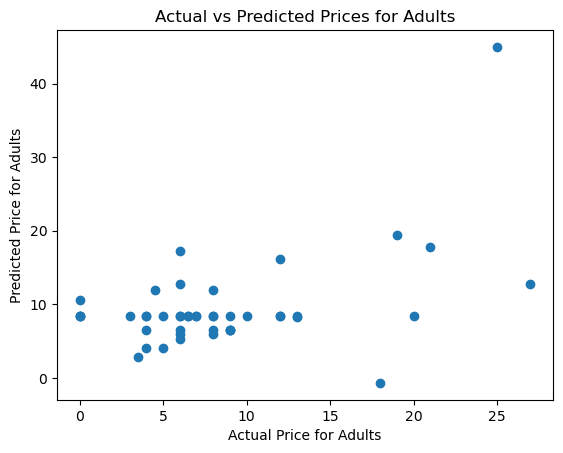

In [190]:
plt.scatter(y_test, y_test_pred)
plt.xlabel('Actual Price for Adults')
plt.ylabel('Predicted Price for Adults')
plt.title('Actual vs Predicted Prices for Adults')
plt.show()

Predictions of the price of children by linear regressions

In [155]:
X = df[['Type', 'City']]
y = df['Children']

In [156]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [157]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [164]:
new_data = [['natural', 'Charleroi']]  # Provide the type and city values for prediction
new_data = ct.transform(new_data)
predicted_price = model.predict(new_data)
print("Predicted Price for Children:", predicted_price)

Predicted Price for Children: [2.60816058]


C:\Users\flori\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


essai d'autres trucs

In [174]:
X = df[['Type', 'City']]
y = df['Adults']

In [176]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 1])],
    remainder='passthrough'
)
X = ct.fit_transform(X)

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [178]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [179]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [182]:
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
r2 = r2_score(y_test, y_test_pred)

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("R-squared:", r2)

Train RMSE: 3.1501722191487564
Test RMSE: 6.481466625035913
R-squared: -0.10732394125787792
